In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
from lxml import html
import numpy as np
from sklearn import preprocessing

In [2]:
r = requests.get('https://www.publicschoolreview.com/hereford-high-school-profile') 

In [44]:
s = pd.read_csv('../data/Maryland_Public_School_Enrollment_Trends__Pre-Kindergarten_to_Grade_12__2010-2021.csv')
s.head()
t = pd.read_csv('../data/Choose_Maryland___Compare_Counties_-_Education.csv', nrows = 24)
m = pd.read_csv('../data/meals.csv')
m

,Agency Name,Year,of sites,Free,Reduced,Paid,Total,F&R/Total
0,Allegany County Public School,2022,24.0,"4,067",253,"3,805","8,125",53.17%
1,Anne Arundel County Public Schools,2022,122.0,"27,159","4,096","52,193","83,448",37.45%
2,Baltimore City Public Schools,2022,160.0,"68,772",0,"9,166","77,938",88.24%
3,Baltimore County Public Schools,2022,168.0,"56,649","2,225","50,393","109,267",53.88%
4,Calvert County Public Schools,2022,23.0,"3,180",341,"11,985","15,506",22.71%
5,Caroline County Public Schools,2022,12.0,"2,803",310,"2,555","5,668",54.92%
6,Carroll County Public Schools,2022,41.0,"4,704",888,"19,445","25,037",22.33%
7,Cecil County Public Schools,2022,31.0,"5,734",620,"8,533","14,887",42.68%
8,Charles County Board Of Education,2022,39.0,"8,322","1,466","17,810","27,598",35.47%
9,Dorchester County Board Of Education,2022,12.0,"3,871",0,717,"4,588",84.37%


In [47]:
m.rename(columns = {'Agency Name': 'Agency_Name',
                    'F&R/Total': 'freeandreduced_lunch'}, inplace = True) 
m

,Agency_Name,Year,of sites,Free,Reduced,Paid,Total,freeandreduced_lunch
0,Allegany County Public School,2022,24.0,"4,067",253,"3,805","8,125",53.17%
1,Anne Arundel County Public Schools,2022,122.0,"27,159","4,096","52,193","83,448",37.45%
2,Baltimore City Public Schools,2022,160.0,"68,772",0,"9,166","77,938",88.24%
3,Baltimore County Public Schools,2022,168.0,"56,649","2,225","50,393","109,267",53.88%
4,Calvert County Public Schools,2022,23.0,"3,180",341,"11,985","15,506",22.71%
5,Caroline County Public Schools,2022,12.0,"2,803",310,"2,555","5,668",54.92%
6,Carroll County Public Schools,2022,41.0,"4,704",888,"19,445","25,037",22.33%
7,Cecil County Public Schools,2022,31.0,"5,734",620,"8,533","14,887",42.68%
8,Charles County Board Of Education,2022,39.0,"8,322","1,466","17,810","27,598",35.47%
9,Dorchester County Board Of Education,2022,12.0,"3,871",0,717,"4,588",84.37%


In [59]:
z = m[m['Year'] == 2022]

z.head()

,Agency_Name,Year,of sites,Free,Reduced,Paid,Total,freeandreduced_lunch
0,Allegany County Public School,2022,24.0,"4,067",253,"3,805","8,125",53.17%
1,Anne Arundel County Public Schools,2022,122.0,"27,159","4,096","52,193","83,448",37.45%
2,Baltimore City Public Schools,2022,160.0,"68,772",0,"9,166","77,938",88.24%
3,Baltimore County Public Schools,2022,168.0,"56,649","2,225","50,393","109,267",53.88%
4,Calvert County Public Schools,2022,23.0,"3,180",341,"11,985","15,506",22.71%


In [66]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency_Name           24 non-null     object 
 1   Year                  24 non-null     int64  
 2   of sites              24 non-null     float64
 3   Free                  24 non-null     object 
 4   Reduced               24 non-null     object 
 5   Paid                  24 non-null     object 
 6   Total                 24 non-null     object 
 7   freeandreduced_lunch  24 non-null     object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ KB


<BarContainer object of 24 artists>

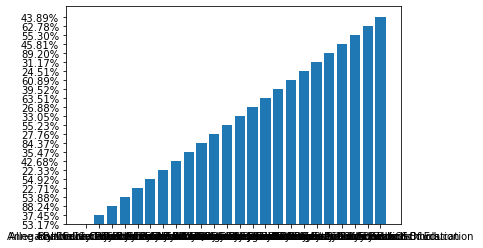

In [65]:
plt.bar(z.Agency_Name,z.freeandreduced_lunch) #need to change the type for lunch total pct to float64

In [5]:
s.rename(columns = {'Baltimore County': 'Baltimore_County',
                    'Baltimore City': 'Baltimore_City',
                    'Harford County': 'Harford_County', 
                    'Allegany County': 'Allegany_County', 
                    'Calvert County': 'Calvert_County',
                    'Anne Arundel County': 'Anne_Arundel_County',
                    'Caroline County': 'Caroline_County',
                    'Carroll County': 'Carroll_County',
                    'Cecil County': 'Cecil_County',
                    'Charles County': 'Charles_County',
                    'Dorchester County': 'Dorchester_County',
                    'Frederick County': 'Frederick_County',
                    'Garrett County': 'Garrett_County',
                    'Kent County': 'Kent_County',
                    'Montgomery County': 'Montgomery_County',
                    'Prince George s County': 'Prince_Georges_County',
                    'Queen Anne s County': 'Queen_Annes_County',
                    'St. Mary s County': 'St_Marys_County',
                    'Somerset County': 'Somerset_County',
                    'Talbot County': 'Talbot_County',
                    'Washington County': 'Washington_County',
                    'Wicomico County': 'Wicomico_County',
                    'Worcester County': 'Worcester_County'}, inplace = True) 

In [38]:
q =s[s['Grades'] == 'Grades 9-12']
z = q.transpose()
q = q.replace("'", "")

z = z.replace("'", "")
z
q.keys()

Index(['Date Created', 'Grades', 'Year', 'Baltimore_City', 'Allegany_County',
       'Anne_Arundel_County', 'Baltimore_County', 'Calvert_County',
       'Caroline_County', 'Carroll_County', 'Cecil_County', 'Charles_County',
       'Dorchester_County', 'Frederick_County', 'Garrett_County',
       'Harford_County', 'Howard County', 'Kent_County', 'Montgomery_County',
       'Prince George's County', 'Queen Anne's County', 'St. Mary's County',
       'Somerset_County', 'Talbot_County', 'Washington_County',
       'Wicomico_County', 'Worcester_County', 'Maryland'],
      dtype='object')

In [39]:
q

,Date Created,Grades,Year,Baltimore_City,Allegany_County,Anne_Arundel_County,Baltimore_County,Calvert_County,Caroline_County,Carroll_County,...,Montgomery_County,Prince George's County,Queen Anne's County,St. Mary's County,Somerset_County,Talbot_County,Washington_County,Wicomico_County,Worcester_County,Maryland
3,01/27/2021,Grades 9-12,2010,24311,2710,22724,31609,5672,1590,9225,...,45307,39337,2446,5177,803,1415,6591,4002,2136,264055
7,01/27/2021,Grades 9-12,2011,23706,2660,22696,30993,5525,1577,9054,...,45232,37272,2412,5220,744,1358,6670,4014,2095,259816
11,01/27/2021,Grades 9-12,2012,23372,2664,22650,31034,5425,1522,8899,...,45150,35938,2315,5048,731,1353,6718,3936,2005,256735
15,01/27/2021,Grades 9-12,2013,22882,2570,22523,30740,5337,1501,8633,...,45132,35174,2325,5075,734,1321,6676,3941,1991,253444
19,01/27/2021,Grades 9-12,2014,22341,2590,22712,30925,5228,1550,8512,...,45633,35495,2296,5008,729,1334,6670,3988,1996,253891
23,01/27/2021,Grades 9-12,2015,21746,2559,22671,31015,5165,1522,8355,...,46122,35393,2237,4929,748,1354,6606,4084,2035,252895
27,01/27/2021,Grades 9-12,2016,21381,2504,22858,31167,5165,1605,8278,...,47450,36099,2325,5024,769,1386,6710,4142,2025,255624
31,01/27/2021,Grades 9-12,2017,20763,2531,23221,31668,5208,1639,8338,...,48829,37067,2351,5149,732,1424,6842,4223,2035,259720
35,04/08/2022,Grades 9-12,2018,20653,2447,23389,32150,5134,1647,8250,...,49656,37126,2378,5157,763,1428,6743,4204,2044,261392
39,04/08/2022,Grades 9-12,2019,21074,2380,23887,33006,5141,1651,8184,...,50794,38181,2408,5236,774,1475,6775,4211,2021,266139


In [40]:
del q['Grades']
q

,Date Created,Year,Baltimore_City,Allegany_County,Anne_Arundel_County,Baltimore_County,Calvert_County,Caroline_County,Carroll_County,Cecil_County,...,Montgomery_County,Prince George's County,Queen Anne's County,St. Mary's County,Somerset_County,Talbot_County,Washington_County,Wicomico_County,Worcester_County,Maryland
3,01/27/2021,2010,24311,2710,22724,31609,5672,1590,9225,4895,...,45307,39337,2446,5177,803,1415,6591,4002,2136,264055
7,01/27/2021,2011,23706,2660,22696,30993,5525,1577,9054,4777,...,45232,37272,2412,5220,744,1358,6670,4014,2095,259816
11,01/27/2021,2012,23372,2664,22650,31034,5425,1522,8899,4672,...,45150,35938,2315,5048,731,1353,6718,3936,2005,256735
15,01/27/2021,2013,22882,2570,22523,30740,5337,1501,8633,4694,...,45132,35174,2325,5075,734,1321,6676,3941,1991,253444
19,01/27/2021,2014,22341,2590,22712,30925,5228,1550,8512,4692,...,45633,35495,2296,5008,729,1334,6670,3988,1996,253891
23,01/27/2021,2015,21746,2559,22671,31015,5165,1522,8355,4720,...,46122,35393,2237,4929,748,1354,6606,4084,2035,252895
27,01/27/2021,2016,21381,2504,22858,31167,5165,1605,8278,4689,...,47450,36099,2325,5024,769,1386,6710,4142,2025,255624
31,01/27/2021,2017,20763,2531,23221,31668,5208,1639,8338,4636,...,48829,37067,2351,5149,732,1424,6842,4223,2035,259720
35,04/08/2022,2018,20653,2447,23389,32150,5134,1647,8250,4568,...,49656,37126,2378,5157,763,1428,6743,4204,2044,261392
39,04/08/2022,2019,21074,2380,23887,33006,5141,1651,8184,4569,...,50794,38181,2408,5236,774,1475,6775,4211,2021,266139


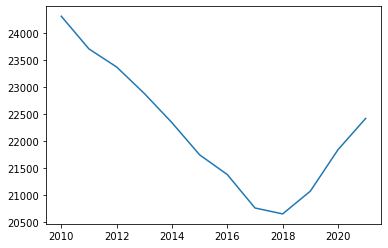

In [41]:
plt.plot(q.Year, q.Baltimore_City)

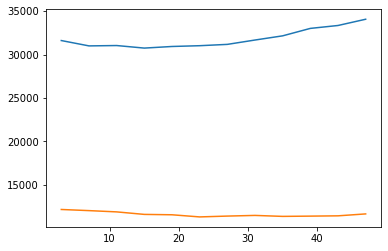

In [42]:
plt.plot(q.Baltimore_County)
plt.plot(q.Harford_County)

In [33]:
t.rename(columns = {'Annual Number of Public High School Graduates': 'highschoolgrads',
                    'Public School Student-Teacher Ratio':'studteachratio',
                    'Public School Expenditures Per Pupil ($ Dollars)':'expense_per_pupil',
                    'Bachelors Degree Attainment (%)':'bach_degree_pct', 
                    'High School Attainment (%)':'grad_rate_pct', 
                    '2-Year College Enrollment':'2_year_college_enrollment', 
                    '4-Year College/University Enrollment':'4_year_college_enrollment'}, inplace = True) 
t.head()

,County,highschoolgrads,studteachratio,expense_per_pupil,Bachelor's Degree Attainment (%),grad_rate_pct,Number of 2-Year Colleges,Number of 4-Year Colleges and Universities,2_year_college_enrollment,4_year_college_enrollment
0,Allegany County,642,13.9,13771,18.3,90.0,1,1,2586.0,4831.0
1,Anne Arundel County,5268,14.7,13648,40.9,92.1,1,2,12655.0,548.0
2,Baltimore City,4108,16.1,15376,31.2,84.9,1,11,4909.0,59254.0
3,Baltimore County,7171,15.1,13880,38.6,91.1,1,7,17732.0,42571.0
4,Calvert County,1227,15.7,14062,31.1,93.9,0,0,NaN,NaN


In [ ]:
sns.set_context('talk')

# Create a grouped bar chart, with job as the x-axis
# and gender as the variable we're grouping on so there
# are two bars per job.
fig, ax = plt.subplots(figsize=(12, 8))

# Our x-axis. We basically just want a list
# of numbers from zero with a value for each
# of our jobs.
x = np.arange(len(t.County.unique()))

# Define bar width. We need this to offset the second bar.
bar_width = 0.4

b1 = ax.bar(x, t.studteachratio,
            width=bar_width, label='s/t')
# Same thing, but offset the x.
b2 = ax.bar(x + bar_width, t.expense_per_pupil,
            width=bar_width, label='expense/pupil')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(t.County.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Job', labelpad=15)
ax.set_ylabel('# Employed', labelpad=15)
ax.set_title('Employed Workers by Gender for Select Jobs', pad=15)

fig.tight_layout()




for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

In [ ]:
plt.barh(t.County, t.studteachratio)

In [ ]:
plt.barh(t.County, t.expense_per_pupil)

In [ ]:
plt.barh(t.County, t.grad_rate_pct)

In [ ]:
print(r.content)

In [ ]:
print(r.url)

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')
print(soup.prettify())

In [ ]:
highschools = ['Hereford', 'Franklin', 'Owings Mills', 'Dulaney', 'New Town', 'Pikesville', 'Towson', 
               'Loch Raven', 'Perry Hall', 'Parkville', 'Randallstown', 'Milford Mill Academy', 'Woodlawn', 
               'Catonsville', 'Landsdowne', 'Overlea', 'Kenwood', 'Eastern Technical', 'Dundalk', 'Chesapeake', 
               'Patapsco', 'Sparrows Point', 'Western School of Technology', 'George Washington Carver Center']

In [ ]:
for i in page:
    #requests.get(f'https://www.publicschoolreview.com/{highschools}-high-school-profile')
    
    page = requests.get(f'https://www.publicschoolreview.com/{highschools}-high-school-profile')
 

    tree = html.fromstring(page.content) 
    
    students = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[2]/strong/text()')
    stratio = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[3]/strong/text()')
    minoritypct = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[4]/strong/text()')
    radrate = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[5]/strong/text()')
    testrank = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[6]/strong/text()')
    mathprof = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[7]/strong/text()')
    readprof = tree.xpath('//*[@id="secondary-content"]/section[1]/div/ul/li[8]/strong/text()')

    print(students)

In [ ]:
page = requests.get('https://www.publicschoolreview.com/overlea-high-school-profile')
page